In [1]:
%matplotlib inline


from matplotlib import colors, cm
from matplotlib.colors import LogNorm

import matplotlib.pyplot as plt
import numpy as np

/home/foliveira/miniconda3/envs/quicklook/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
import scalar_metrics_v02
reload(scalar_metrics_v02)
from scalar_metrics_v02 import LoadMetrics

In [17]:
def grid_plot(qa, key):
    fig, ax = plt.subplots()

    to_plot = np.array(qa[key]).reshape(2,2)
    vmin, vmax = np.min(qa[key]), np.max(qa[key])
    if vmin != 0: vmin= 0.8*vmin
    else:         vmin =1e-8*vmax
    if vmax != 0: vmax = 1.1*vmax
    im         = ax.imshow(to_plot, interpolation='nearest',norm=LogNorm(vmin=vmin, vmax=vmax) )

    ax.axis('off')
    for (j, i), _ in np.ndenumerate(grid):
        label = 'AMP {}\n {:>4.4f}'.format(i+j+j+1, to_plot[i,j])
        ax.text(i,j,label,ha='center',va='center', color='black', fontsize=14)

    cb = plt.colorbar(im,ax=ax)
    cb.ax.tick_params(labelsize=11)
    return None


In [ ]:
cam, exp, night = 'z0', '00000003', '20190101'
print "\n\nTests for the available scalars and using yaml output\n", "="*50
print "TO DO:\n *docs of functions \n *what more else?"
lm = LoadMetrics(cam, exp, night)

In [8]:
print lm.keys_from_scalars(lm.params_keys)
print lm.test_ranges('getbias', 'warn')
print lm.qa_status('countpix')

{'skycont': {'warn': 'SKYCONT_WARN_RANGE', 'alarm': 'SKYCONT_ALARM_RANGE'}, 'skyresid': {'warn': 'SKY_WARN_RANGE', 'alarm': 'SKY_ALARM_RANGE'}, 'xsigma': {'warn': 'XSHIFT_WARN_RANGE', 'alarm': 'XSHIFT_ALARM_RANGE'}, 'skypeak': {'warn': 'SUMCOUNT_WARN_RANGE', 'alarm': 'SUMCOUNT_ALARM_RANGE'}, 'countpix': {'warn': 'NPIX_WARN_RANGE', 'alarm': 'NPIX_ALARM_RANGE'}, 'integ': {'warn': 'MAGDIFF_WARN_RANGE', 'alarm': 'MAGDIFF_ALARM_RANGE'}, 'getrms': {'warn': 'RMS_WARN_RANGE', 'alarm': 'RMS_ALARM_RANGE'}, 'snr': {'warn': 'FIDSNR_WARN_RANGE', 'alarm': 'FIDSNR_ALARM_RANGE'}, 'countbins': {'warn': 'NGOOD_WARN_RANGE', 'alarm': 'NGOOD_ALARM_RANGE'}, 'getbias': {'warn': 'DIFF_WARN_RANGE', 'alarm': 'DIFF_ALARM_RANGE'}, 'wsigma': {'warn': 'WSHIFT_WARN_RANGE', 'alarm': 'WSHIFT_ALARM_RANGE'}}
[-1.0, 1.0]
ALARM


In [9]:

metrics, tests  = lm.Load_metrics_n_tests()

countpix loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countpix-z0-00000003.yaml
getbias loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getbias-z0-00000003.yaml
getrms loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-getrms-z0-00000003.yaml
xwsigma loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-xwsigma-z0-00000003.yaml
countbins loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-countbins-z0-00000003.yaml
integ loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-integ-z0-00000003.yaml
skycont loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skycont-z0-00000003.yaml
skypeak loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skypeak-z0-00000003.yaml
skyresid loaded
/home/felipe/quicklook/spectro/redux/exposures/20190101/00000003/ql-skyresid-z0-00000003.yaml
snr loaded
/home/felipe/qu

In [10]:
#AUXILIARY
countpix  = metrics['countpix']
getbias   = metrics['getbias']
getrms    = metrics['getrms']
xwsigma   = metrics['xwsigma']
countbins = metrics['countbins']
integ     = metrics['integ']
skycont   = metrics['skycont']
skypeak   = metrics['skypeak']
skyresid  = metrics['skyresid']
snr       = metrics['snr']

### Dictionary

In [11]:
def explorer(name):
    print '* {} *'.format(name)
    x = metrics[name]
    for i in x.viewkeys():
        try:
            print 'List : {} {}'.format( i, len(x[i]))
            #if len(x[i]) == 2:
            #    print '  \t\t {} {} '.format(len(x[i])[0], len(x[i])[1])
        except:
            print 'float: {} {}'.format( i,  x[i])

steps_dic_from_file = {'preproc':['countpix', 'getbias','getrms','xwsigma'],
              'extract':['countbins'],
              'fiberfl':['integ', 'skycont', 'skypeak', 'skyresid'],
              'skysubs':['snr']}
steps_list = ['preproc', 'extract', 'fiberfl', 'skysubs']

def explorer_test(name):
    print '\ntests',name
    x = tests[name]
    for i in x.viewkeys():
        try:
            print 'List : {} {}'.format( i, len(x[i]))
            #if len(x[i]) == 2:
            #    print '  \t\t {} {} '.format(len(x[i])[0], len(x[i])[1])
        except:
            print 'float: {} {}'.format( i,  x[i])
    print '---'*8, '\n' 


In [12]:
for j in list(steps_dic_from_file.viewkeys()):
    print '** {} **'.format(j) 
    for i in steps_dic_from_file[j]:
        explorer(i)
        explorer_test(i)
    print '===='*8,'\n'

** preproc **
* countpix *
List : NPIX_LOW_AMP 4
List : NPIX_HIGH_AMP 4
List : NPIX_ERR 5
float: NPIX_LOW 320420
float: NPIX_HIGH 38091

tests countpix
List : NPIX_ALARM_RANGE 2
float: CUTHI 10
List : NPIX_WARN_RANGE 2
float: CUTLO 3
------------------------ 

* getbias *
float: DATA5SIG 1
List : BIASDIFF_ERR 6
List : BIAS_AMP 4
float: DIFF1SIG 0.055
float: BIAS 0.142170109525
float: DIFF3SIG 0.063
float: DIFF2SIG 0.06
List : MEANBIAS_ROW 4128

tests getbias
List : DIFF_ALARM_RANGE 2
List : PERCENTILES 3
List : DIFF_WARN_RANGE 2
------------------------ 

* getrms *
List : RMS_OVER_AMP 4
float: RMS 6.7692220134
float: RMS_OVER 8.91115356073
List : EXPNUM_WARN 0
List : RMSDIFF_ERR 5
List : RMS_ROW 8256
List : RMS_AMP 4

tests getrms
List : RMS_ALARM_RANGE 2
List : RMS_WARN_RANGE 2
------------------------ 

* xwsigma *
List : XSHIFT_FIB 0
List : XSHIFT_AMP 1
List : WSHIFT_AMP 1
List : SHIFT_ERR 6
float: XSHIFT 0.0
float: XSIGMA_MED 1.21074954653
float: XSIGMA_MED_SKY 1.21074954653
List 

<a id="main"></a>



### QA Steps

[Step 1 (countpix, getbias, getrms,  xwsigma)]( #step1)

[Step 2 (countbins)](#step2)

[Step 3 (integ, skycount, skypeak, skyresid)](#step3)

[Step 4 (snr)](#step4)

###  =================

<a id="step1"  style="color:red">Step 1: PRE PROCESSING</a> 

[(Back to Main)](#main)    [Next =>](#step2)

#### 1.1) CountPix

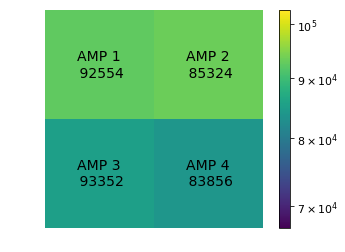

In [15]:
#preproc

grid =np.array([[0,1],[0,1]])
fig, ax = plt.subplots()

to_plot = np.array(countpix['NPIX_LOW_AMP']).reshape(2,2)
vmin, vmax = np.min(countpix['NPIX_LOW_AMP']), np.max(countpix['NPIX_LOW_AMP'])
if vmin != 0: vmin= 0.8*vmin
if vmax != 0: vmax = 1.1*vmax
im         = ax.imshow(to_plot,  interpolation='nearest',norm=LogNorm(vmin=vmin, vmax=vmax) )

ax.axis('off')
for (j, i), _ in np.ndenumerate(grid):
    label = 'AMP {}\n {}'.format(i+j+j+1, to_plot[i,j])
    ax.text(i,j,label,ha='center',va='center', color='black', fontsize=14)

cb = plt.colorbar(im,ax=ax)
cb.ax.tick_params(labelsize=11)


#### 1.2) Getbias

dict_keys(['DATA5SIG', 'BIASDIFF_ERR', 'BIAS_AMP', 'DIFF1SIG', 'BIAS', 'DIFF3SIG', 'DIFF2SIG', 'MEANBIAS_ROW'])

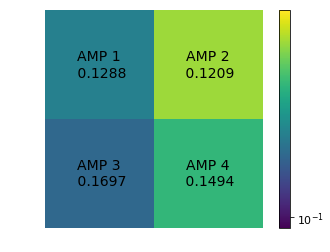

In [18]:
grid_plot(getbias, 'BIAS_AMP')
getbias.viewkeys()

#### 1.3) Getrms

#### 1.4) XWsigma

'Why is the mean calculated here different from the ql output?'

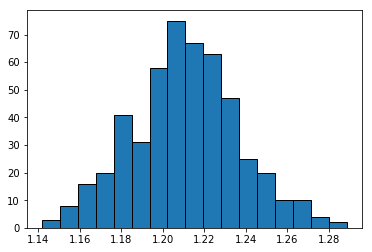

In [19]:
plt.hist(xwsigma['XSIGMA'], bins = 17, edgecolor='k')
np.mean(xwsigma['XSIGMA'])

"""Why is the mean calculated here different from the ql output?"""

'Why is the mean calculated here different from the ql output?'

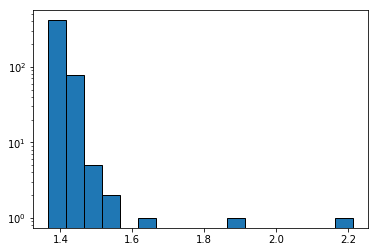

In [29]:
plt.gca().set_yscale("log")
plt.hist(xwsigma['WSIGMA'], bins=17, edgecolor='k')
np.mean(xwsigma['WSIGMA'])
"""Why is the mean calculated here different from the ql output?"""

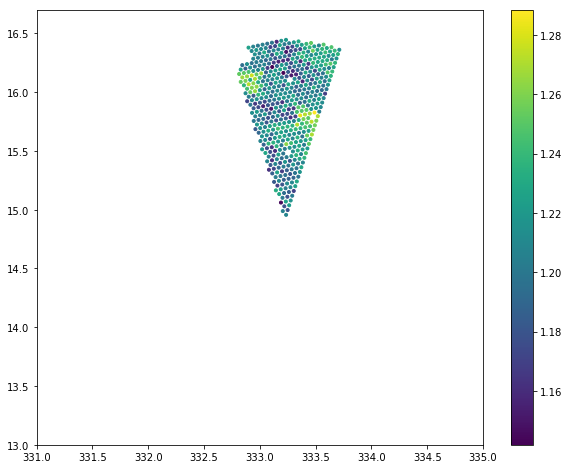

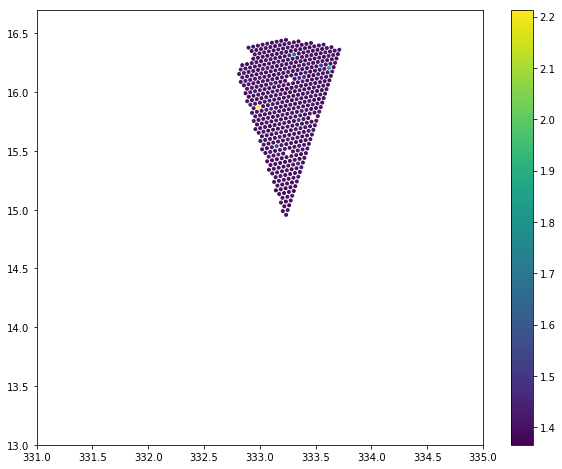

In [21]:
# XWSIGMA
'''mym, myt = metric['xwsigma'] , test['xwsigma']
print myt, '\n'

for i in list(mym.viewkeys()):
    if i not in ['DEC', 'RA', 'WAVELENGTH', 'WAVG_RES_WAVE','MED_RESID_WAVE', 'XSIGMA', 'WSIGMA']:
        print i, mym[i]      
print mym.viewkeys()

import matplotlib.pyplot as plt'''
camnum =  [ int(s) for s in cam if s.isdigit()][0]
c1,c2  = camnum*500, (camnum+1)*500
plt.figure(figsize=(10,8))
plt.xlim(331,335)
plt.ylim(13,16.7)

plt.scatter(xwsigma['RA'][c1:c2], xwsigma['DEC'][c1:c2], marker='.', c= xwsigma['XSIGMA'])#, c= mym['XSIGMA'])#, mym['WSIGMA'], edgecolor = 'k')
plt.colorbar()
plt.show()
plt.figure(figsize=(10,8))
plt.xlim(331,335)
plt.ylim(13,16.7)
plt.scatter(xwsigma['RA'][c1:c2], xwsigma['DEC'][c1:c2], marker='.', c= xwsigma['WSIGMA'])
plt.colorbar()


###  =================

<a id="step2" style="color:red">Step 2: EXTRACTION </a>     

[<= Back](#step1) [  (Back to Main)  ](#main)   [Next =>](#step3)

#### 2.1) Countbins

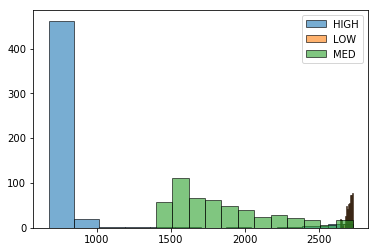

In [22]:
plt.hist( countbins['NBINSHIGH'], bins=12, edgecolor='k', alpha=0.6 , label='HIGH')
plt.hist( countbins['NBINSLOW'], bins=12, edgecolor='k', alpha=0.6, label='LOW')
plt.hist( countbins['NBINSMED'], bins=12, edgecolor='k', alpha=0.6, label='MED')
plt.legend(loc='best')


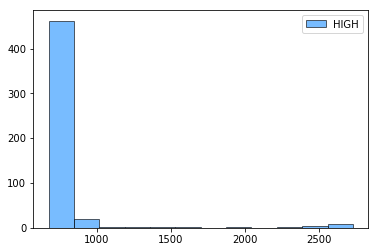

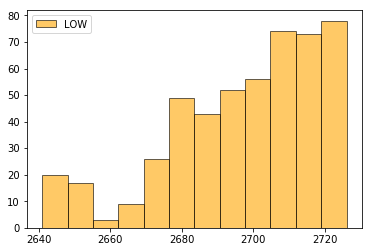

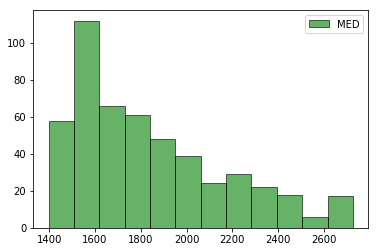

In [23]:
color = ['dodgerblue', 'orange','green' ]
for i, key in enumerate(['NBINSHIGH', 'NBINSLOW', 'NBINSMED']):
    plt.hist( countbins[key], bins=12, facecolor=color[i], edgecolor='k', alpha=0.6, label=key.replace('NBINS',""))
    plt.legend(loc='best')
    plt.show();    plt.close()



###  =================

<a id="step3" style="color:red">Step 3</a>    

[<= Back](#step2) [  (Back to Main)  ](#main) [Next =>](#step4)


#### 3.1) Integ

[859499.2501536638, 4701053.936494476, 12482662.54232116, 1124668.0879246425, 1704141.6090423162, 1550023.32786221, 1139325.0304595234, 7878288.991134519, 830594.091772338]
[25, 168, 202, 250, 273, 294, 336, 413, 492]
[2557434.403475322, 1384121.174711195, 2043170.833334315, 1129985.5247097085] 

: INTEG_AVG : INTEG 9 :	: STD_FIBERID 9 :	: MAGDIFF_ERR 6 :	: INTEG_AVG_AMP 4 :	: MAGDIFF_AVG_AMP 1 :	: DEC 5000 :	: MAGDIFF_AVG : RA 5000 :	

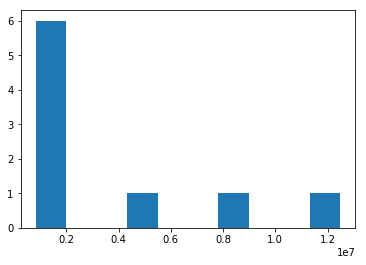

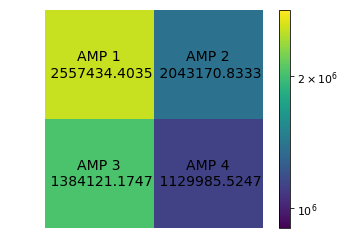

In [24]:
print integ['INTEG']
print integ['STD_FIBERID']
print integ['INTEG_AVG_AMP'],'\n'
int_k =  list(integ.viewkeys())
for k in int_k:
    try: 
        print':', k, len(integ[k]),':\t',
    except:
        pass
        
plt.hist(integ['INTEG'])
grid_plot(integ,'INTEG_AVG_AMP')

#### 3.2) skycount

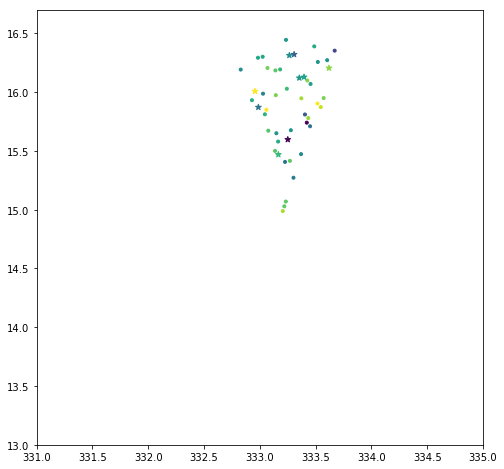

In [26]:
#float: SKYCONT 156.515486839
#List : DEC 5000
#List : RA 5000
#print skycont['SKYCONT_AMP']
#print skycont['SKYCONT_FIBER']
#print skycont['SKYFIBERID']
plt.figure(figsize=(8,8))
plt.xlim(331,335)
plt.ylim(13,16.7)
x = [ skycont['RA'][i]  for i in skycont['SKYFIBERID'] ]
y = [ skycont['DEC'][i] for i in skycont['SKYFIBERID'] ]

x2 = [ integ['RA'][i]  for i in integ['STD_FIBERID'] ]
y2 = [ integ['DEC'][i] for i in integ['STD_FIBERID'] ]

plt.scatter(x,y , c = skycont['SKYCONT_FIBER'], marker='.')
plt.scatter(x2,y2 , c =integ['STD_FIBERID'], marker='*') #integ['STD_FIBERID']

 


#### 3.3 Skypeak

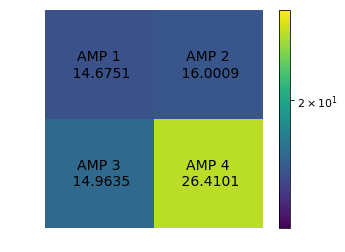

In [27]:
grid_plot(skypeak,'SUMCOUNT_RMS_AMP')

#### 3.4) Skyresid)

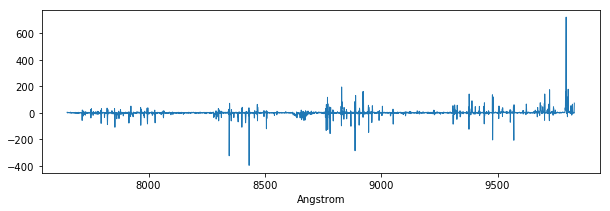

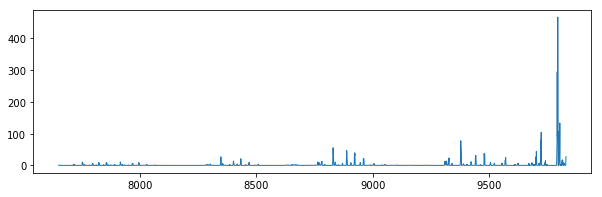

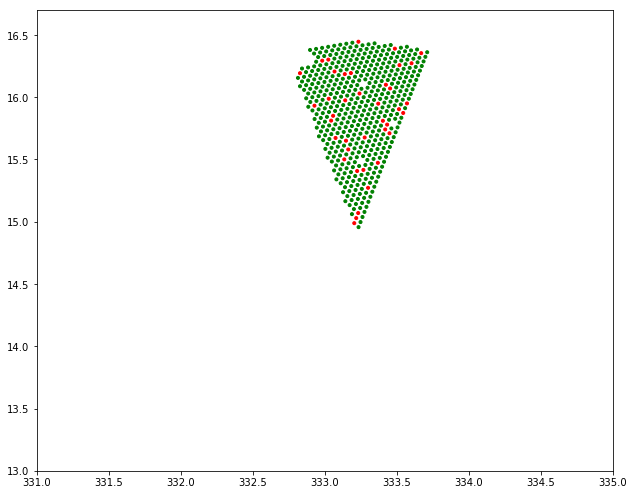

In [28]:
plt.figure(figsize=(10,3))
plt.plot(skyresid['WAVELENGTH'], skyresid['MED_RESID_WAVE'], linewidth =1)
plt.xlabel('Angstrom')
plt.show() ; plt.close()

plt.figure(figsize=(10,3))
plt.plot(skyresid['WAVELENGTH'], skyresid['WAVG_RES_WAVE'], linewidth =1)
ax.set_xlabel('Angstrom')
plt.show() ; plt.close()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.1,0.1,0.8,0.8],polar=False)
ax.set_xlim(331,335)
ax.set_ylim(13,16.7)


bad = skyresid['SKY_FIBERID']
col, mark =[],[]
for x in range(500):
    if x in bad:
        col.append('red')
        mark.append('s')
    else:
        col.append('green')
        mark.append('.')

ax.scatter(skyresid['RA'], skyresid['DEC'], c= col, marker=".")
#ax.scatter(countbins['RA'], countbins['DEC'][bad], c=, marker=".")

plt.show(); plt.close()


<a id="step4"  style="color:red">Step 4 SKY SUBSTRACTION</a>     

[<= Back](#step3)  [  (Back to Main)  ](#main) 

#### 4.1) SNR

In [30]:
#SAME AS IN THE LAST VERSION!

snr.viewkeys()

dict_keys(['ELG_FITRESULTS', 'STAR_FIDMAG_SNR', 'ELG_FIDMAG_SNR', 'STAR_FIBERID', 'MEDIAN_SNR', 'QSO_FITRESULTS', 'LRG_SNR_MAG', 'DEC', 'LRG_FIDMAG_SNR', 'QSO_SNR_MAG', 'FIDSNR_WARN', 'QSO_FIDMAG_SNR', 'LRG_FIBERID', 'STAR_FITRESULTS', 'ELG_SNR_MAG', 'RA', 'ELG_FIBERID', 'LRG_FITRESULTS', 'QSO_FIBERID', 'STAR_SNR_MAG', 'NUM_NEGATIVE_SNR'])

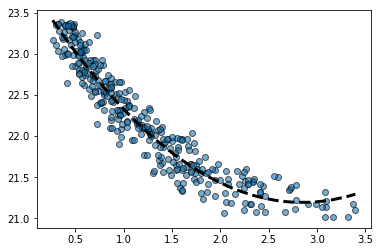

In [56]:
a, b, c = snr['ELG_FITRESULTS'][0]
a, b, c = np.polyfit(x,y, 2)
x = snr['ELG_SNR_MAG'][0]
y = snr['ELG_SNR_MAG'][1]
x2 = np.array(sorted(x))
plt.scatter(x, y, marker='o',  edgecolor='k', alpha=0.6)
plt.plot(x2, x2**2*a + x2**1*b + x2**0*c, 'k--',lw=3)

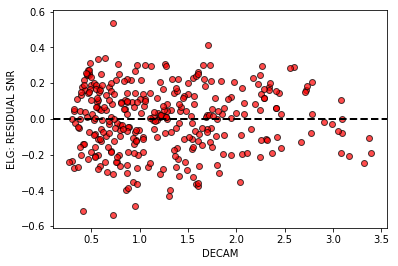

In [74]:
a, b, c = snr['ELG_FITRESULTS'][0]
a, b, c = np.polyfit(x,y, 2)
x = snr['ELG_SNR_MAG'][0]
y = snr['ELG_SNR_MAG'][1]
xres = np.array(x)
yfit =  xres**2*a + xres**1*b + xres**0*c
yres = np.array(y) - yfit
x2 = np.array(sorted(x))
plt.ylabel('ELG'+': RESIDUAL SNR')
plt.xlabel('DECAM')

plt.axhline(0, color='k', linestyle='--', lw=2)

plt.scatter(xres, yres, color = 'red',marker='o',  edgecolor='k', alpha=0.7)


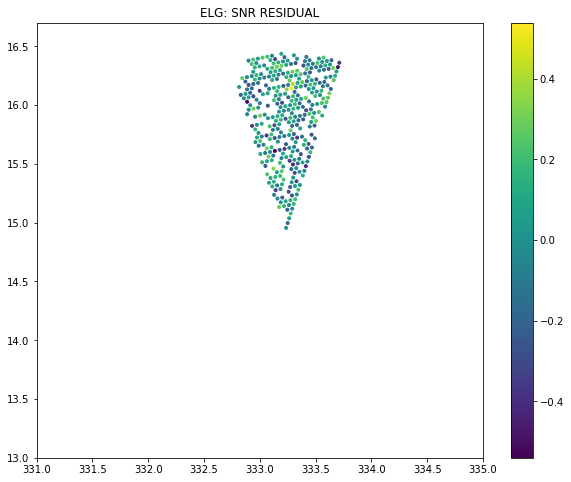

In [95]:
color = [x for x in yres]
plt.figure(figsize=(10,8))
plt.xlim(331,335)
plt.ylim(13,16.7)

ra, dec = [], []
for i in snr['ELG_FIBERID']:
    ra.append(snr['RA'][i])
    dec.append(snr['DEC'][i])

if len(color) != len(ra) or len(color) != len(dec): print 'Error'    
plt.scatter(ra, dec, marker='.', c=color)
plt.title('ELG' + ': SNR RESIDUAL' )
#, c= mym['XSIGMA'])#, mym['WSIGMA'], edgecolor = 'k')
plt.colorbar()
plt.show()


In [140]:
def fit_residual(obn):
    """ Find the fitting function for an object
    Arguments:
    ---------
    obn: str
        Object name. Valid names are:
        'ELG', 'LRG', 'STAR', 'QSO'
    Returns:
    x, y: lists 
    xres, yres: array
    
    """
    x = snr[obn+'_SNR_MAG'][0]
    y = snr[obn+'_SNR_MAG'][1]
    a, b, c = snr[obn+'_FITRESULTS'][0]
    a, b, c = np.polyfit(x,y, 2)
    xres = np.array(x)
    yfit =  xres**2*a + xres**1*b + xres**0*c
    yres = np.array(y) - yfit
    return x,y, xres, yres


def snr_residual(obj_name):
    obn = str(obj_name)
    x,y, xres, yres = fit_residual(obn)
    
    x2 = np.array(sorted(x))
    plt.ylabel(obn+': RESIDUAL SNR')
    plt.xlabel('DECAM')

    plt.axhline(0, color='k', linestyle='--', lw=2)
    plt.scatter(xres, yres, color = 'red',marker='o',  edgecolor='k', alpha=0.7)


def wedge_residual(obj_name, frame=True):
    import matplotlib.cm as cm
    obn = str(obj_name)
    x,y, xres, yres = fit_residual(obn)

    color = [x for x in yres]
    if(frame == True):
        plt.figure(figsize=(10,8))
        plt.xlim(331,335)
        plt.ylim(13,16.7)
        marker='.'
    else:
        plt.figure(figsize=(5*1.2, 4*1.2))
        marker='H'

    # Select valid IDs
    ra, dec = [], []
    for i in snr[obn+'_FIBERID']:
        ra.append(snr['RA'][i])
        dec.append(snr['DEC'][i])
        

    if len(color) != len(ra) or len(color) != len(dec): return 'Error'    
    plt.scatter(ra, dec, marker=marker, c=color, cmap ="YlOrRd", edgecolor='')
    plt.title(obn + ': SNR RESIDUAL' )
    #, c= mym['XSIGMA'])#, mym['WSIGMA'], edgecolor = 'k')
    plt.colorbar()
    plt.show()
    return None

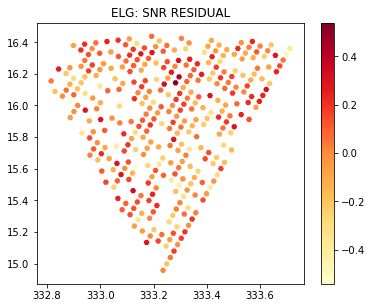

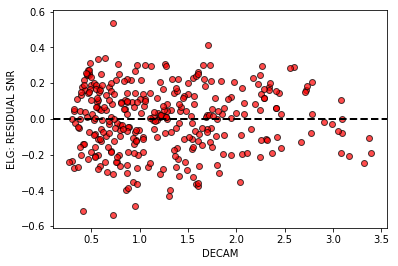

In [141]:
# 'ELG', 'QSO', 'STAR', 'LRG'
wedge_residual('ELG', frame=False)
snr_residual('ELG')
